<a href="https://colab.research.google.com/github/mynameiswyj/myproject/blob/main/%EB%B9%84%EC%A3%BC%EC%96%BC%ED%8C%8C%EC%9D%B4%EC%8D%AC(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 비주얼 파이썬 | 캐글 타이타닉 데이터

## Data Analysis > Import

In [48]:
# Visual Python: Data Analysis > Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Data Analysis > File

In [8]:
# Visual Python: Data Analysis > File
trainDF = pd.read_csv('./train.csv')
trainDF

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Data Analysis > Data Info

In [16]:
# Visual Python: Data Analysis > Data Info
trainDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
# Visual Python: Data Analysis > Data Info
trainDF.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [29]:
# Visual Python: Data Analysis > Data Info
trainDF['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [32]:
# Visual Python: Data Analysis > Data Info
trainDF['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [38]:
# Visual Python: Data Analysis > Data Info
trainDF['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [41]:
# Visual Python: Data Analysis > Data Info
trainDF['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

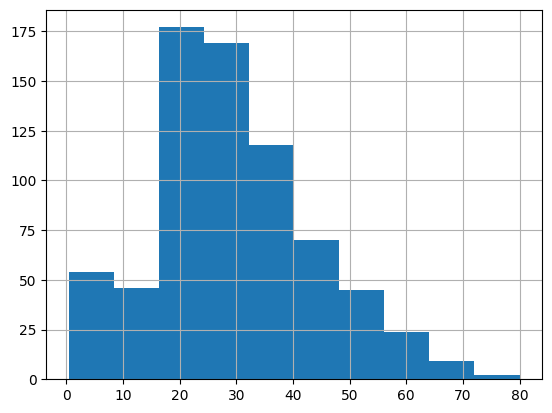

In [60]:
# Visual Python: Data Analysis > Data Info
trainDF['Age'].hist()
plt.show()

## Statistics > ANOVA

### One-way ANOVA (일원분산분석)

예제) Pclass에 따라 Survived에 영향을 미치는가를 분석

In [72]:
# Visual Python: ANOVA
from scipy import stats
def vp_confidence_interval(var, confidence_level=0.95):
    try: sr = pd.Series(var)
    except: return np.nan
    return stats.t.interval(confidence_level, df=sr.count()-1, loc=sr.mean(), scale=sr.std() / np.sqrt(sr.count()) )
def vp_sem(var):
    try: sr = pd.Series(var)
    except: return np.nan
    return sr.std() / np.sqrt(sr.count())

### Statistics

,Count,Mean,Std. Deviation,Min,Max,Std. Error Mean,Confidence interval,Lower,Upper
1,158,0.670886,0.471386,0.0,1.0,0.037501,0.95,0.596814,0.744958
2,15,0.800000,0.414039,0.0,1.0,0.106904,0.95,0.570713,1.029287
3,10,0.500000,0.527046,0.0,1.0,0.166667,0.95,0.122974,0.877026


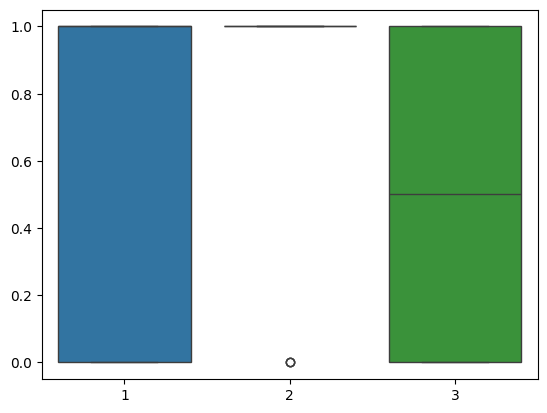

### Equal Variance test (Levene)

,Statistic,p-value
Equal Variance test (Levene),4.509914,0.012271


### One-way ANOVA

,df,sum_sq,mean_sq,F,PR(>F)
C(Pclass),2.0,0.541793,0.270896,1.225589,0.296023
Residual,180.0,39.786076,0.221034,NaN,NaN
Total,182.0,40.327869,NaN,NaN,NaN


### Post-hoc: Tukey HSD

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,0.1291,0.5674,-0.1711,0.4293,False
1,3,-0.1709,0.5063,-0.5332,0.1914,False
2,3,-0.3,0.2644,-0.7536,0.1536,False


In [73]:
# Visual Python: ANOVA
# One-way ANOVA
vp_df = trainDF.dropna().copy()

from IPython.display import display, Markdown
_df = pd.DataFrame()
for k, v in  dict(list(vp_df.groupby('Pclass')['Survived'])).items():
    _df_t = v.reset_index(drop=True)
    _df_t.name = k
    _df = pd.concat([_df, _df_t], axis=1)

# Statistics
display(Markdown('### Statistics'))
display(pd.DataFrame(data={'Count':_df.count(),'Mean':_df.mean(numeric_only=True),'Std. Deviation':_df.std(numeric_only=True),'Min':_df.min(),'Max':_df.max(),
                           'Std. Error Mean':_df.apply(vp_sem),'Confidence interval':0.95,
                           'Lower':_df.apply(vp_confidence_interval).T[0],'Upper':_df.apply(vp_confidence_interval).T[1] }))

# Boxplot
import seaborn as sns
import warnings
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=Warning)
    sns.boxplot(data=_df)
    plt.show()

# Equal Variance test (Levene)
from scipy import stats
_lst = []
_df.apply(lambda x: _lst.append(x.dropna()))
_res = stats.levene(*_lst, center='mean')
display(Markdown('### Equal Variance test (Levene)'))
display(pd.DataFrame(data={'Statistic':_res.statistic,'p-value':_res.pvalue}, index=['Equal Variance test (Levene)']))

# One-way ANOVA
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
_model  = smf.ols('Survived ~ C(Pclass)', vp_df)
_result = _model.fit()
_dfr = anova_lm(_result)
_dfr.loc['Total','df'] = _dfr['df'].sum()
_dfr.loc['Total','sum_sq'] = _dfr['sum_sq'].sum()
display(Markdown('### One-way ANOVA'))
display(_dfr)

# Post-hoc: Tukey HSD
from statsmodels.sandbox.stats.multicomp import MultiComparison
_res = MultiComparison(vp_df['Survived'], vp_df['Pclass']).tukeyhsd(alpha=0.05)
display(Markdown('### Post-hoc: Tukey HSD'))
display(_res.summary())

[ANOVA 결과 해석 방법]
* p-value < 0.05 : "ANOVA 테스트 결과, (Pclass에 따라 Survived에) 유의미한 영향을 미침"
* p-value > 0.05 : "ANOVA 테스트 결과, (Pclass에 따라 Survived에) 유의미한 영향을 미치지 않음" → 해당 분석 결과는 PR(>F)가 0.296023 이라는 결과가 나왔으므로 Pclass와 Survived 간의 통계적으로 유의미한 관계를 발견하지 못했다.

## Statistics > Regression

### Multiple linear regression (다중 회귀 분석)

분석을 진행하기 전에, 이후 회귀분석을 진행하기 위하여 object 타입인 변수를 숫자로 먼저 변경해주었다.

In [283]:
# Visual Python: Data Analysis > Frame
reg_tainDF = trainDF.copy()
reg_tainDF.drop(['PassengerId','Name','Ticket','Cabin'], axis=1, inplace=True)
reg_tainDF['Embarked_label'] = pd.Categorical(reg_tainDF['Embarked']).codes
reg_tainDF['Sex'] = reg_tainDF[['Sex']].replace({'female': 1, 'male': 0})
reg_tainDF.drop(['Embarked'], axis=1, inplace=True)
reg_tainDF

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_label
0,0,3,0,22.0,1,0,7.2500,2
1,1,1,1,38.0,1,0,71.2833,0
2,1,3,1,26.0,0,0,7.9250,2
3,1,1,1,35.0,1,0,53.1000,2
4,0,3,0,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,2
887,1,1,1,19.0,0,0,30.0000,2
888,0,3,1,NaN,1,2,23.4500,2
889,1,1,0,26.0,0,0,30.0000,0


#### Method: Enter

### Model - Dependent variable ~ Independent variable

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     68.01
Date:                Thu, 21 Mar 2024   Prob (F-statistic):           7.11e-75
Time:                        02:06:28   Log-Likelihood:                -321.41
No. Observations:                 714   AIC:                             658.8
Df Residuals:                     706   BIC:                             695.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.9186      0.084     10.

### Residual

,predict,residual,predict_z,residual_z
0,0.094429,-0.094429,-1.000181,-0.248797
1,0.930583,0.069417,1.682574,0.182898
2,0.605250,0.394750,0.638761,1.040071
3,0.885126,0.114874,1.536727,0.302666
4,0.062565,-0.062565,-1.102413,-0.164845
...,...,...,...,...
885,0.504916,-0.504916,0.316846,-1.330332
886,0.305446,-0.305446,-0.323144,-0.804776
887,1.035438,-0.035438,2.018998,-0.093372
889,0.566742,0.433258,0.515210,1.141530


### Residual Normality test (Shapiro-Wilk)

,Statistic,p-value
Resisual Normality test (Shapiro-Wilk),0.971795,1.684007e-10


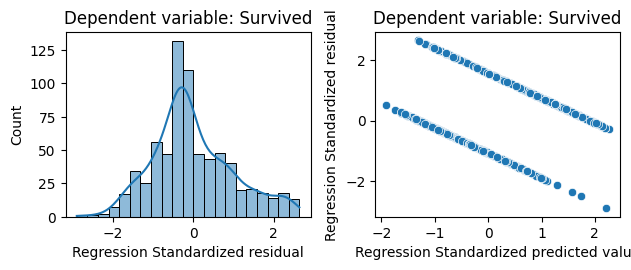

In [309]:
# Visual Python: Regression
# Multiple linear regression > Method: Enter
vp_df = reg_tainDF.dropna().copy()

# Model - Dependent variable ~ Independent variable
from IPython.display import display, Markdown
import statsmodels.formula.api as smf
_model  = smf.ols('Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked_label', vp_df)
_result = _model.fit()
display(Markdown('### Model - Dependent variable ~ Independent variable'))
print(_result.summary())

# Residual
from IPython.display import display, Markdown
from scipy import stats
import statsmodels.api as sm
_predict  = _result.predict(vp_df)
_residual = _result.resid
vp_residual = pd.DataFrame({'predict':_predict,'residual':_residual,
                            'predict_z':stats.zscore(_predict),'residual_z':stats.zscore(_residual)})
display(Markdown('### Residual'))
display(vp_residual)

# Resisual Normality test (Shapiro-Wilk)
_res = stats.shapiro(vp_residual['residual_z'])
display(Markdown('### Residual Normality test (Shapiro-Wilk)'))
display(pd.DataFrame(data={'Statistic':_res.statistic,'p-value':_res.pvalue},index=['Resisual Normality test (Shapiro-Wilk)']))

import seaborn as sns
import warnings
with warnings.catch_warnings():

    # Residual histogram
    plt.subplot(2,2,1)
    warnings.simplefilter(action='ignore', category=Warning)
    sns.histplot(data=vp_residual, x='residual_z', kde=True)
    plt.title(f'Dependent variable: {_model.endog_names}')
    plt.xlabel('Regression Standardized residual')

    # Residual scatterplot
    plt.subplot(2,2,2)
    sns.scatterplot(data=vp_residual, x='predict_z', y='residual_z')
    plt.title(f'Dependent variable: {_model.endog_names}')
    plt.xlabel('Regression Standardized predicted value')
    plt.ylabel('Regression Standardized residual')

    plt.tight_layout()
    plt.show()

[회귀분석 결과]
* R-squared: 0.403



---



#### Method: Stepwise

<ipython-input-97-315bdb1116ee>:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_pval = pd.Series(index=col_list)
<ipython-input-97-315bdb1116ee>:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_pval = pd.Series(index=col_list)
<ipython-input-97-315bdb1116ee>:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_pval = pd.Series(index=col_list)
<ipython-input-97-315bdb1116ee>:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_pval = pd.Series(index=col_list)
<ipython-input-97-315bdb1116ee>:7: FutureWarning: The default dt

### Model 1 - Dependent variable ~ Independent variable

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     291.3
Date:                Thu, 21 Mar 2024   Prob (F-statistic):           5.22e-55
Time:                        01:50:31   Log-Likelihood:                -382.98
No. Observations:                 714   AIC:                             770.0
Df Residuals:                     712   BIC:                             779.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2053      0.019     10.547      0.0

,coef,std err,t,P>|t|,[0.025,0.975],Tolerance,VIF
,,,,,,,,
const,0.2053,0.019,10.547,0.000,0.167,0.244,NaN,NaN
Sex,0.5495,0.032,17.067,0.000,0.486,0.613,1.0,1.0


### Model 2 - Dependent variable ~ Stepwised variable

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     118.0
Date:                Thu, 21 Mar 2024   Prob (F-statistic):           3.81e-77
Time:                        01:50:31   Log-Likelihood:                -323.22
No. Observations:                 714   AIC:                             656.4
Df Residuals:                     709   BIC:                             679.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9101      0.069     13.119      0.0

,coef,std err,t,P>|t|,[0.025,0.975],Tolerance,VIF
,,,,,,,,
const,0.9101,0.069,13.119,0.000,0.774,1.046,NaN,NaN
Sex,0.4865,0.031,15.937,0.000,0.427,0.546,0.944876,1.058340
Pclass,-0.2053,0.019,-10.937,0.000,-0.242,-0.168,0.826147,1.210439
Age,-0.0066,0.001,-5.839,0.000,-0.009,-0.004,0.768498,1.301240
SibSp,-0.0545,0.016,-3.359,0.001,-0.086,-0.023,0.898028,1.113550


### Residual - Model 2

,predict,residual,predict_z,residual_z
0,0.095555,-0.095555,-1.000349,-0.251126
1,0.887673,0.112327,1.550763,0.295204
2,0.610335,0.389665,0.657563,1.024070
3,0.907343,0.092657,1.614111,0.243510
4,0.064837,-0.064837,-1.099278,-0.170398
...,...,...,...,...
885,0.525100,-0.525100,0.383054,-1.380007
886,0.322557,-0.322557,-0.269263,-0.847705
887,1.066765,-0.066765,2.127549,-0.175464
889,0.534380,0.465620,0.412940,1.223687


### Residual Normality test (Shapiro-Wilk)

,Statistic,p-value
Resisual Normality test (Shapiro-Wilk),0.973342,4.048362e-10


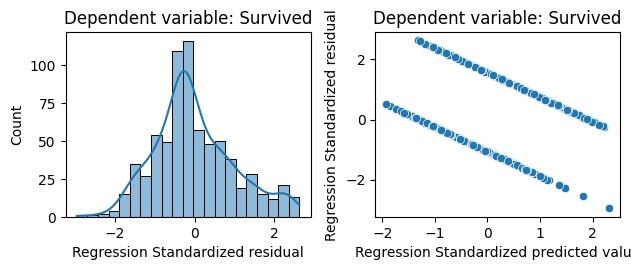

In [296]:
# Visual Python: Regression
# Multiple linear regression > Method: Stepwise
vp_df = reg_tainDF.dropna().copy()

_selected_stepwise = vp_stepwise_select(vp_df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked_label']], vp_df['Survived'])

# Model 1 - Dependent variable ~ Independent variable
from IPython.display import display, Markdown
import statsmodels.api as sm
_model  = sm.OLS(vp_df['Survived'], sm.add_constant(vp_df[_selected_stepwise[0]]))
_result = _model.fit()
display(Markdown('### Model 1 - Dependent variable ~ Independent variable'))
print(_result.summary())

# Model 1 - Multi-collinearity statistics
from statsmodels.stats.outliers_influence import variance_inflation_factor
_dfr = pd.DataFrame(_result.summary().tables[1].data[1:],columns=_result.summary().tables[1].data[0]).set_index('')
for i, col in enumerate(_model.exog_names[1:]):
    _vif = variance_inflation_factor(_model.exog, i+1)
    _dfr.loc[col,'Tolerance'] = 1/_vif
    _dfr.loc[col,'VIF'] = _vif
display(_dfr)

# Model 2 - Dependent variable ~ Stepwised variable
import statsmodels.api as sm
_model  = sm.OLS(vp_df['Survived'], sm.add_constant(vp_df[_selected_stepwise]))
_result = _model.fit()
display(Markdown('### Model 2 - Dependent variable ~ Stepwised variable'))
print(_result.summary())

# Model 2 - Multi-collinearity statistics
from statsmodels.stats.outliers_influence import variance_inflation_factor
_dfr = pd.DataFrame(_result.summary().tables[1].data[1:],columns=_result.summary().tables[1].data[0]).set_index('')
for i, col in enumerate(_model.exog_names[1:]):
    _vif = variance_inflation_factor(_model.exog, i+1)
    _dfr.loc[col,'Tolerance'] = 1/_vif
    _dfr.loc[col,'VIF'] = _vif
display(_dfr)

# Residual - Model 2
from IPython.display import display, Markdown
from scipy import stats
import statsmodels.api as sm
_predict =  _result.predict(sm.add_constant(vp_df[_model.exog_names[1:]]))
_residual = _result.resid
vp_residual = pd.DataFrame({'predict':_predict,'residual':_residual,
                            'predict_z':stats.zscore(_predict),'residual_z':stats.zscore(_residual)})
display(Markdown('### Residual - Model 2'))
display(vp_residual)

# Resisual Normality test (Shapiro-Wilk)
_res = stats.shapiro(vp_residual['residual_z'])
display(Markdown('### Residual Normality test (Shapiro-Wilk)'))
display(pd.DataFrame(data={'Statistic':_res.statistic,'p-value':_res.pvalue},index=['Resisual Normality test (Shapiro-Wilk)']))

import seaborn as sns
import warnings
with warnings.catch_warnings():

    # Residual histogram
    plt.subplot(2,2,1)
    warnings.simplefilter(action='ignore', category=Warning)
    sns.histplot(data=vp_residual, x='residual_z', kde=True)
    plt.title(f'Dependent variable: {_model.endog_names}')
    plt.xlabel('Regression Standardized residual')

    # Residual scatterplot
    plt.subplot(2,2,2)
    sns.scatterplot(data=vp_residual, x='predict_z', y='residual_z')
    plt.title(f'Dependent variable: {_model.endog_names}')
    plt.xlabel('Regression Standardized predicted value')
    plt.ylabel('Regression Standardized residual')

    plt.tight_layout()
    plt.show()

[회귀분석 결과]
* R-squared: 0.400

## Statistics > Logistic Regression